In [86]:
import numpy as np
from scipy.io import loadmat, wavfile
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import speech_recognition as sr
from Signal_Analysis.features.signal import get_F_0, get_HNR

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5

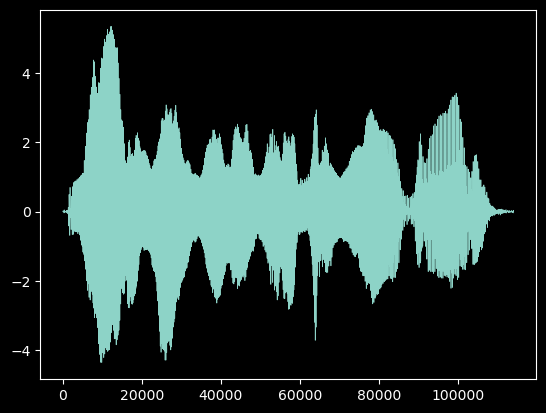

In [70]:
roy  = loadmat("Roy.mat")
x = roy["datafilt"].reshape(-1)
x /=x.std()
Fs = 48000

plt.figure()
plt.plot(x)

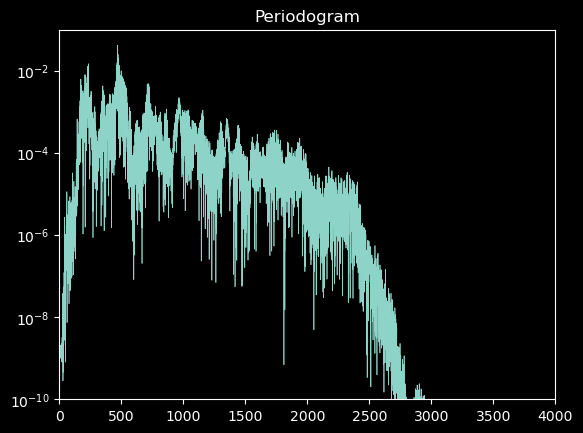

In [77]:
ff, per = signal.periodogram(x,Fs)
plt.figure()
plt.semilogy(ff,per)
plt.xlim(0,4000)
plt.ylim(1e-10,1e-1)
plt.title("Periodogram")
plt.show()

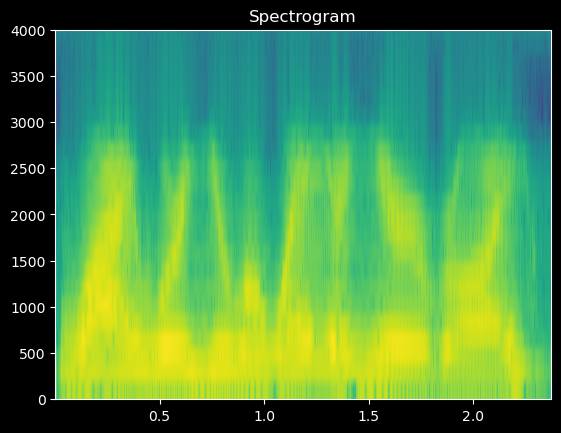

In [79]:
plt.figure()
spect, ff, tt, im = plt.specgram(x, Fs=Fs)
plt.ylim(0, 4000)
plt.title("Spectrogram")
plt.show()

In [65]:
scaled = np.int16(x / np.max(np.abs(x)) * np.iinfo(np.int16).max)
wavfile.write("roy.wav", Fs, scaled)

In [91]:
r = sr.Recognizer()
with sr.AudioFile("roy.wav") as source:
    audio_text = r.listen(source)

try:
    text = r.recognize_google(audio_text)
except:
    pass
print(text)

VOWELS = ["e","y","u","i","o","a"]

print("# vowels", np.sum([c in VOWELS for c in text.lower()]))

why were you away a year Roy
# vowels 15


In [108]:
get_F_0(x, Fs)


<class 'numpy.float64'> 



[193.2459677419355]

228


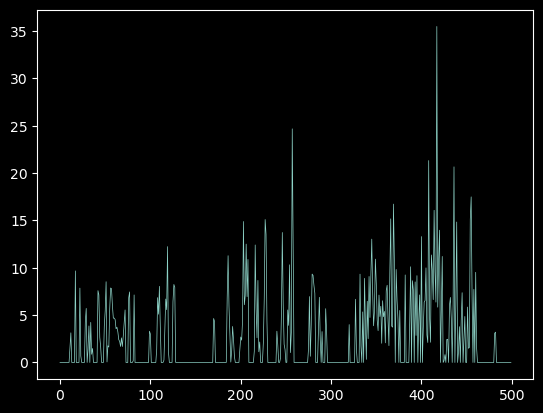

In [122]:
N = 500

step = int(np.floor(len(x) / N))
print(step)

hnr = np.empty(N)

for k in range(N):
    xk = x[k * step : (k + 1) * step]
    hnr[k] = get_HNR(xk, Fs)

plt.figure()
plt.plot(hnr)